In [10]:
from pipeline.trainer import Trainer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from config.convolutional_features import CONV_FEATURES, TOTAL_CONV_OPS_PER_INPUT, TOTAL_CONV_OPS_PER_BATCH

In [11]:
data_config = {
    'data_dir': 'training_data',
    'cross_validation': 10,
    'test_models': ["lenet"]
}


CONVOLUTION_PIPELINE = {
    "power": {
        "is_log": True,
        "degree": 3,
        "special_terms_list": [TOTAL_CONV_OPS_PER_INPUT, TOTAL_CONV_OPS_PER_BATCH],
    },
    "runtime": {
        "is_log": False,
        "degree": 3,
        "special_terms_list": [TOTAL_CONV_OPS_PER_INPUT, TOTAL_CONV_OPS_PER_BATCH],
    },
}


In [18]:
trainer = Trainer(data_config=data_config, features=CONV_FEATURES)

dataset = trainer.get_dataset(pattern='**/convolutional.csv')

pipeline = trainer.get_model(features_mapping=trainer.dataset_builder.features_mapping,
                                                   polynomial_degree=CONVOLUTION_PIPELINE['power']['degree'],
                                                   is_log=CONVOLUTION_PIPELINE['power']['degree'],
                                                   special_terms_list=CONVOLUTION_PIPELINE['power']['special_terms_list']
                                                  )

print(pipeline)

Pipeline(steps=[('transformer',
                 FeatureUnion(transformer_list=[('regular_polynomial',
                                                 Pipeline(steps=[('log1p',
                                                                  FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                 ('polynomial_features',
                                                                  PolynomialFeatures(degree=3))])),
                                                ('special_polynomial',
                                                 FunctionTransformer(func=<function ModelBuilder.get_special_polynomial_terms_transformer.<locals>._build_special_terms at 0x747adb8e5120>))])),
                ('scaler', StandardScaler()),
                ('lasso', LassoCV(cv=10, max_iter=80000, n_alphas=500))])


In [19]:
%%time
train_features, power_train = dataset.train.input_features.values, dataset.train.power.values
pipeline.fit(train_features, power_train)

Pipeline(steps=[('transformer',
                 FeatureUnion(transformer_list=[('regular_polynomial',
                                                 Pipeline(steps=[('log1p',
                                                                  FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                 ('polynomial_features',
                                                                  PolynomialFeatures(degree=3))])),
                                                ('special_polynomial',
                                                 FunctionTransformer(func=<function ModelBuilder.get_special_polynomial_terms_transformer.<locals>._build_special_terms at 0x747adb8e5120>))])),
                ('scaler', StandardScaler()),
                ('lasso', LassoCV(cv=10, max_iter=80000, n_alphas=500))])

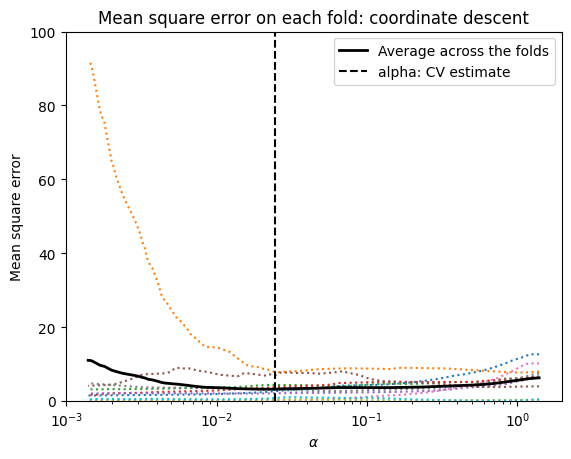

In [24]:
import matplotlib.pyplot as plt

ymin, ymax = 0, 100
lasso = pipeline[-1]
plt.semilogx(lasso.alphas_, lasso.mse_path_, linestyle=":")
plt.plot(
    lasso.alphas_,
    lasso.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lasso.alpha_, linestyle="--", color="black", label="alpha: CV estimate")

plt.ylim(ymin, ymax)
plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
_ = plt.title("Mean square error on each fold: coordinate descent")

In [27]:
pipeline = trainer.get_model(features_mapping=trainer.dataset_builder.features_mapping,
                                                   polynomial_degree=CONVOLUTION_PIPELINE['runtime']['degree'],
                                                   is_log=CONVOLUTION_PIPELINE['runtime']['degree'],
                                                   special_terms_list=CONVOLUTION_PIPELINE['runtime']['special_terms_list']
                                                  )

print(pipeline)

Pipeline(steps=[('transformer',
                 FeatureUnion(transformer_list=[('regular_polynomial',
                                                 Pipeline(steps=[('log1p',
                                                                  FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                 ('polynomial_features',
                                                                  PolynomialFeatures(degree=3))])),
                                                ('special_polynomial',
                                                 FunctionTransformer(func=<function ModelBuilder.get_special_polynomial_terms_transformer.<locals>._build_special_terms at 0x747ad6d6b920>))])),
                ('scaler', StandardScaler()),
                ('lasso', LassoCV(cv=10, max_iter=80000, n_alphas=500))])


In [ ]:
%%time
train_features, runtime_train = dataset.train.input_features.values, dataset.train.runtime.values
pipeline.fit(train_features, runtime_train)

In [ ]:
import matplotlib.pyplot as plt

ymin, ymax = 0, 100
lasso = pipeline[-1]
plt.semilogx(lasso.alphas_, lasso.mse_path_, linestyle=":")
plt.plot(
    lasso.alphas_,
    lasso.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lasso.alpha_, linestyle="--", color="black", label="alpha: CV estimate")

plt.ylim(ymin, ymax)
plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
_ = plt.title("Mean square error on each fold: coordinate descent")